# 1.Generating Random Networks

# 1. Create random networks using Erd ̈os-R ́enyi (ER) model

# (a)

In [2]:
install.packages("igraph")

package 'igraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Gaofang\AppData\Local\Temp\Rtmpa8jkdj\downloaded_packages


Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



[1] "Probability = 0.003"
[1] 1000
[1] "Mean degree: 3.014"
[1] "Variance of degree: 3.04484884884885"
[1] "----------------------------------------"
[1] "Probability = 0.004"
[1] 1000
[1] "Mean degree: 3.926"
[1] "Variance of degree: 4.02454854854855"
[1] "----------------------------------------"


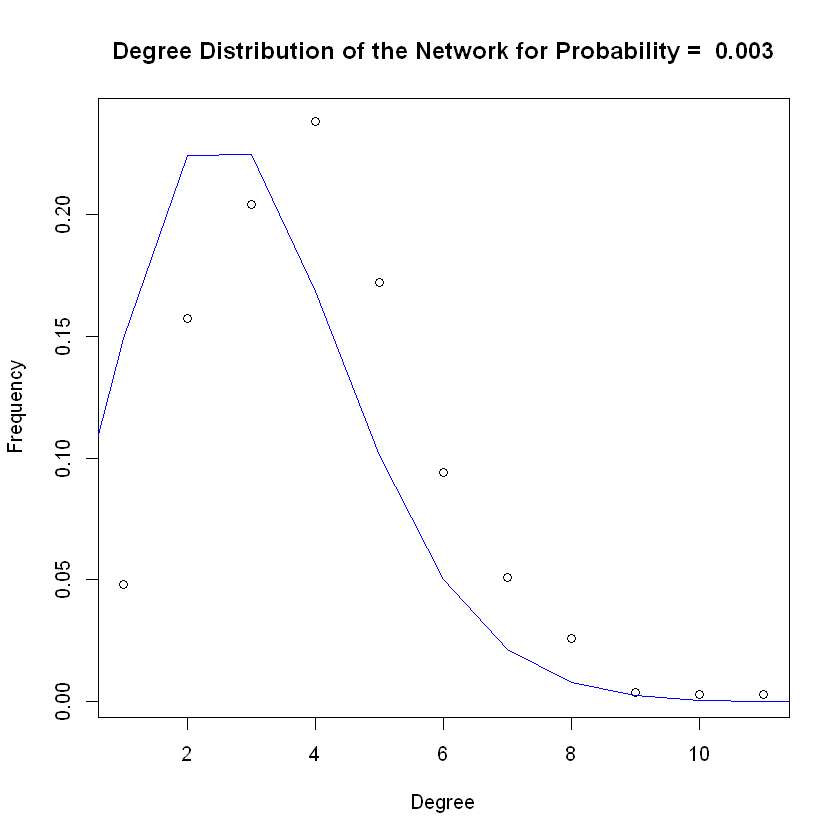

[1] "Probability = 0.01"
[1] 1000
[1] "Mean degree: 9.826"
[1] "Variance of degree: 10.3280520520521"
[1] "----------------------------------------"


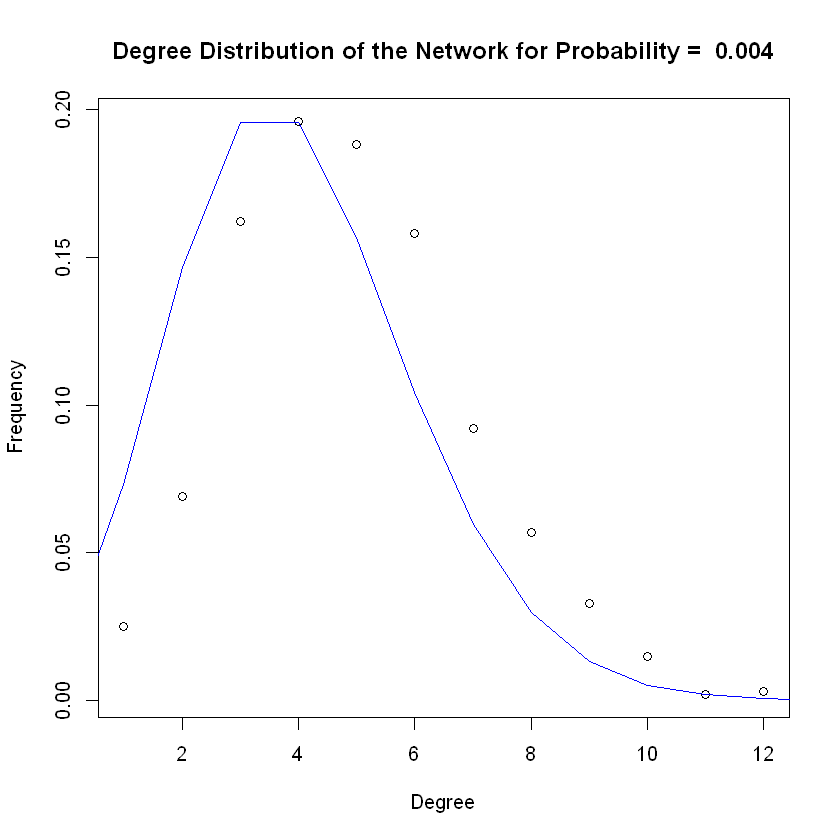

[1] "Probability = 0.05"
[1] 1000
[1] "Mean degree: 49.632"
[1] "Variance of degree: 51.2037797797798"
[1] "----------------------------------------"


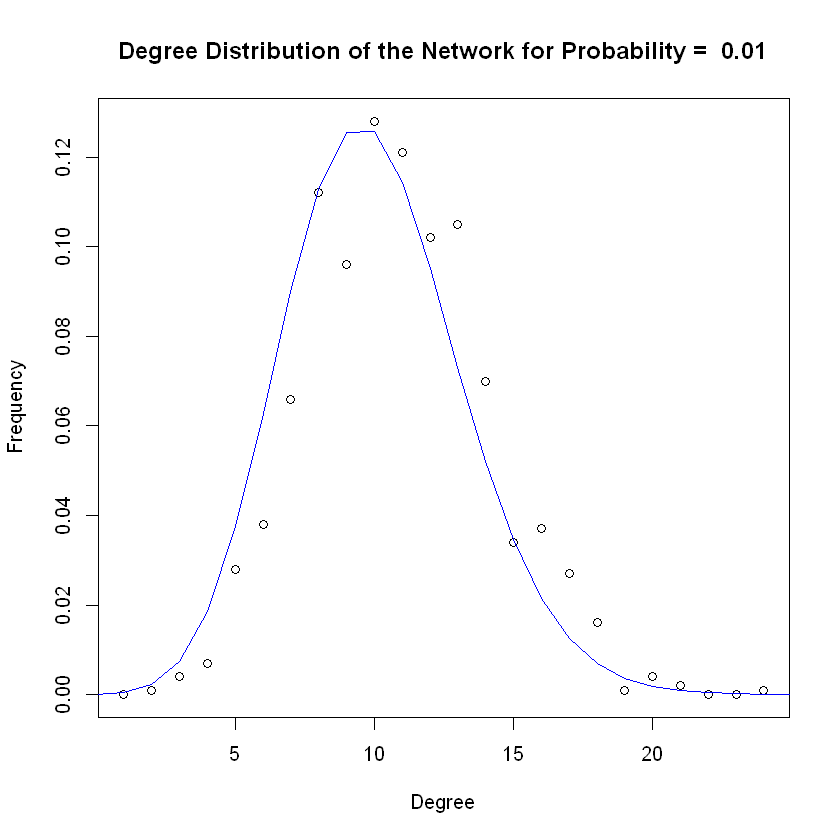

[1] "Probability = 0.1"
[1] 1000
[1] "Mean degree: 100.202"
[1] "Variance of degree: 89.7049009009009"
[1] "----------------------------------------"


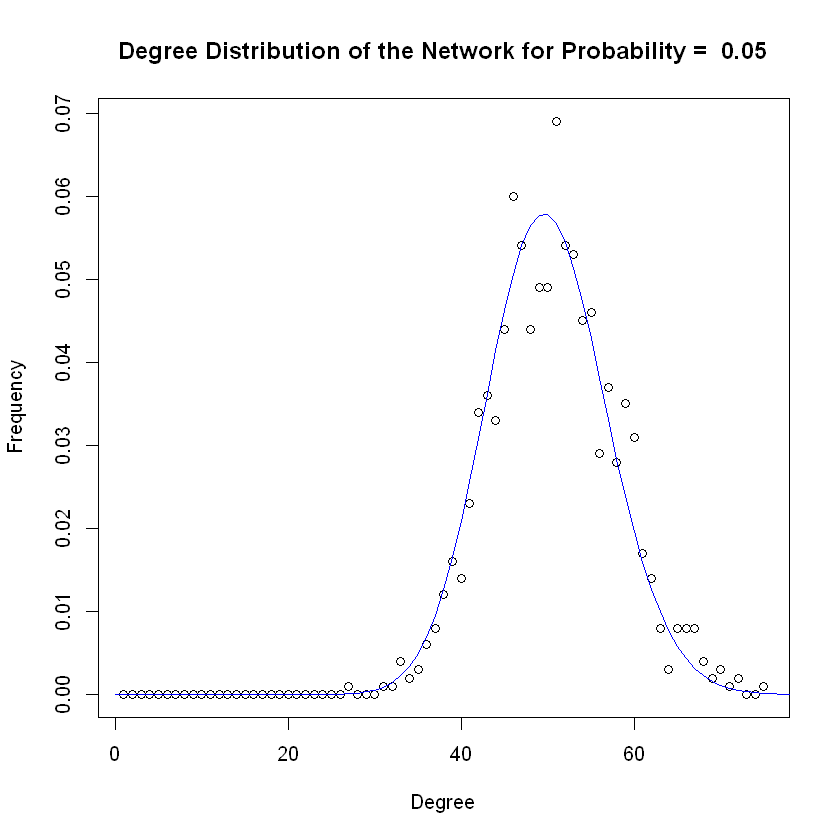

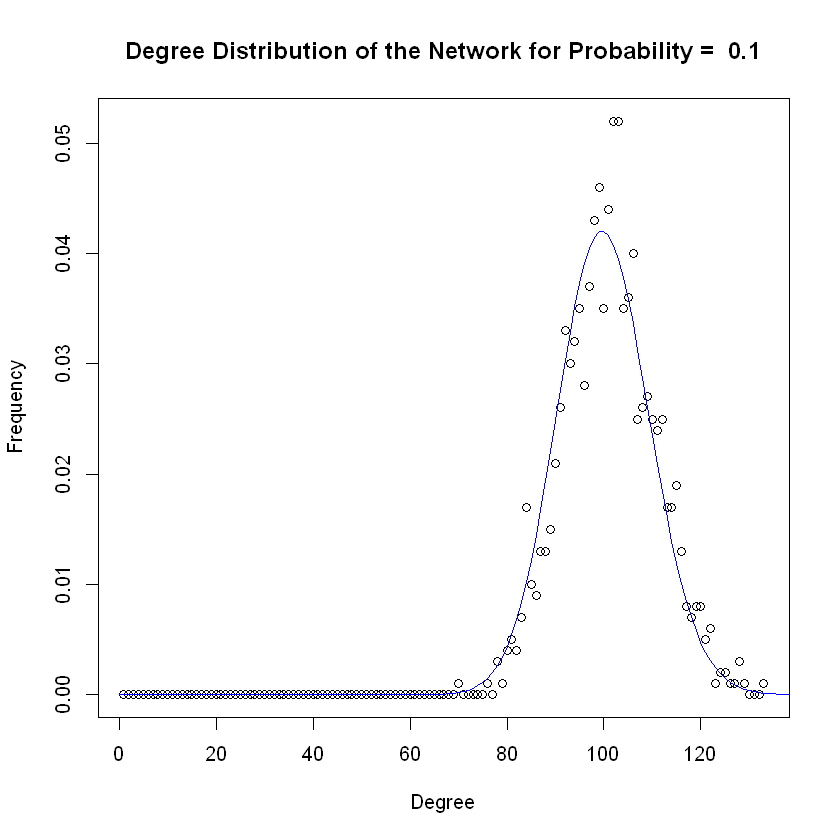

In [6]:
library(igraph)
n = 1000
probability <- c(0.003, 0.004, 0.01, 0.05, 0.1)
graphs = list()

for (p in probability) {
  g = sample_gnp(n, p, directed = FALSE, loops = FALSE)
  graphs[[length(graphs) + 1]] = g
  print (paste("Probability =", p))
  print(length(V(g)))
  print (paste("Mean degree:", mean(degree(g))))
  print (paste("Variance of degree:", var(degree(g))))
  print (paste("----------------------------------------"))
  plot(degree.distribution(g),main=paste("Degree Distribution of the Network for Probability = ", p),xlab="Degree",ylab="Frequency")
  lines(seq(0,150, by=1),dbinom(seq(0,150, by=1),n,p), col = 'blue')
  degreesVector <- degree(g)
}

# (b)

In [24]:
for (i in 1:length(probability))
{
    p = probability[i]
    g = graphs[[i]]
    print(paste("For probability = ", p))
    if (is.connected(g))
        print('The graph is connected.')
    else
        print('The graph is not connected.')
    
    g_components = clusters(g)
    ix = which.max(g_components$csize) 
    g_giant = induced.subgraph(g, which(g_components$membership == ix)) 

    print(paste("Number of nodes of GCC:", vcount(g_giant)))

    cur_diameter = diameter(g_giant, directed = FALSE)
    print(paste("The Diameter of GCC:", cur_diameter))
    
    connected_number = 0
    for (i in 1:1000)
    {
        g = sample_gnp(n, p, directed = FALSE, loops = FALSE)
        if (is.connected(g))
            connected_number = connected_number + 1
    }
    print(paste("Probability that the network is connected is", connected_number / 1000))
    print("-----------------------------------------------")
}

[1] "When p =  0.003"
[1] "The graph is not connected."
[1] "Number of nodes of GCC: 947"
[1] "The Diameter of GCC: 14"
[1] "Probability that the network is connected is 0"
[1] "-----------------------------------------------"
[1] "When p =  0.004"
[1] "The graph is not connected."
[1] "Number of nodes of GCC: 981"
[1] "The Diameter of GCC: 10"
[1] "Probability that the network is connected is 0"
[1] "-----------------------------------------------"
[1] "When p =  0.01"
[1] "The graph is connected."
[1] "Number of nodes of GCC: 1000"
[1] "The Diameter of GCC: 5"
[1] "Probability that the network is connected is 0.957"
[1] "-----------------------------------------------"
[1] "When p =  0.05"
[1] "The graph is connected."
[1] "Number of nodes of GCC: 1000"
[1] "The Diameter of GCC: 3"
[1] "Probability that the network is connected is 1"
[1] "-----------------------------------------------"
[1] "When p =  0.1"
[1] "The graph is connected."
[1] "Number of nodes of GCC: 1000"
[1] "The Diam

# (c)

[1] "p = 0"
[1] 0.001
[1] "p = 1e-04"
[1] 0.00100 0.00358
[1] "p = 2e-04"
[1] 0.00100 0.00358 0.00503
[1] "p = 3e-04"
[1] 0.00100 0.00358 0.00503 0.00609
[1] "p = 4e-04"
[1] 0.00100 0.00358 0.00503 0.00609 0.00822
[1] "p = 5e-04"
[1] 0.00100 0.00358 0.00503 0.00609 0.00822 0.01199
[1] "p = 6e-04"
[1] 0.00100 0.00358 0.00503 0.00609 0.00822 0.01199 0.01540
[1] "p = 7e-04"
[1] 0.00100 0.00358 0.00503 0.00609 0.00822 0.01199 0.01540 0.02180
[1] "p = 8e-04"
[1] 0.00100 0.00358 0.00503 0.00609 0.00822 0.01199 0.01540 0.02180 0.03264
[1] "p = 9e-04"
 [1] 0.00100 0.00358 0.00503 0.00609 0.00822 0.01199 0.01540 0.02180 0.03264
[10] 0.05437
[1] "p = 0.001"
 [1] 0.00100 0.00358 0.00503 0.00609 0.00822 0.01199 0.01540 0.02180 0.03264
[10] 0.05437 0.10164
[1] "p = 0.0011"
 [1] 0.00100 0.00358 0.00503 0.00609 0.00822 0.01199 0.01540 0.02180 0.03264
[10] 0.05437 0.10164 0.16771
[1] "p = 0.0012"
 [1] 0.00100 0.00358 0.00503 0.00609 0.00822 0.01199 0.01540 0.02180 0.03264
[10] 0.05437 0.10164 0.16771 

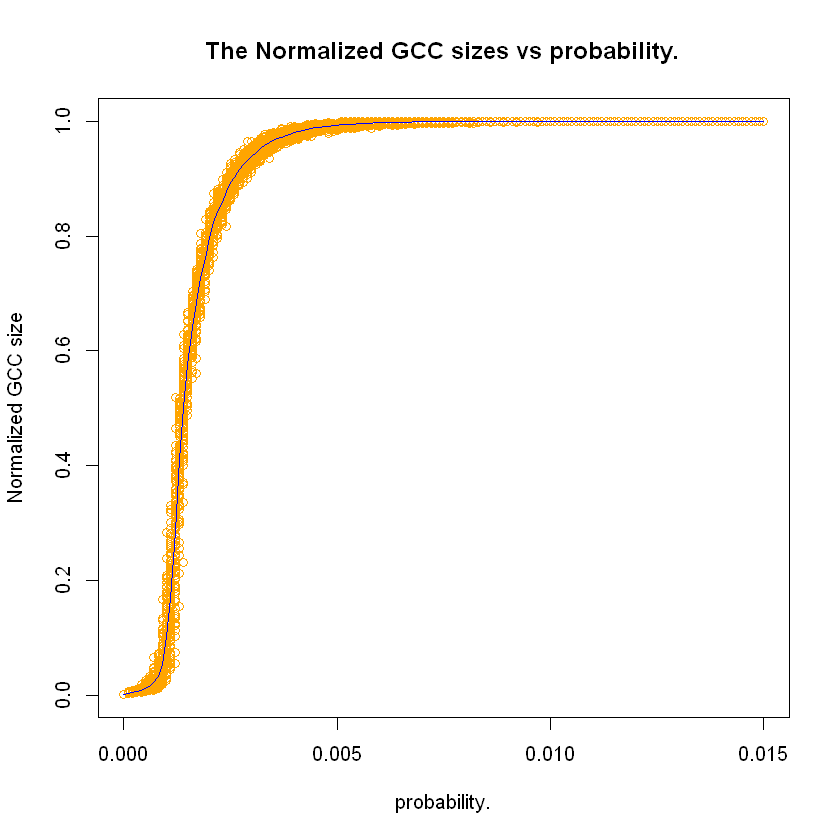

In [27]:
pmax = 0.015
prob <- seq(from=0.000, to=pmax, by=0.0001)
result <- c()
scat_len <- c()
scat_prob <- c()
for (val in prob) 
{
  size <- 0
  for (iter in 1:100)
  {
    g = sample_gnp(n, val, directed = FALSE, loops = FALSE)
    g.components <- clusters(g)
    ix <- which.max(g.components$csize)
    g.giant <- induced.subgraph(g, which(g.components$membership == ix))
    scat_prob <- c(scat_prob, val)  
    scat_len <- c(scat_len, length(V(g.giant))/1000)
    size <- size + length(V(g.giant))/1000  
  }
  result <- c(result,(size/100))
  print(paste("p =",val))
  print(result)
}
plot(scat_prob, scat_len,col='orange', main='The Normalized GCC sizes vs probability.', xlab = 'probability.', ylab = 'Normalized GCC size')
lines(prob,result, col='blue')

# d

# i.

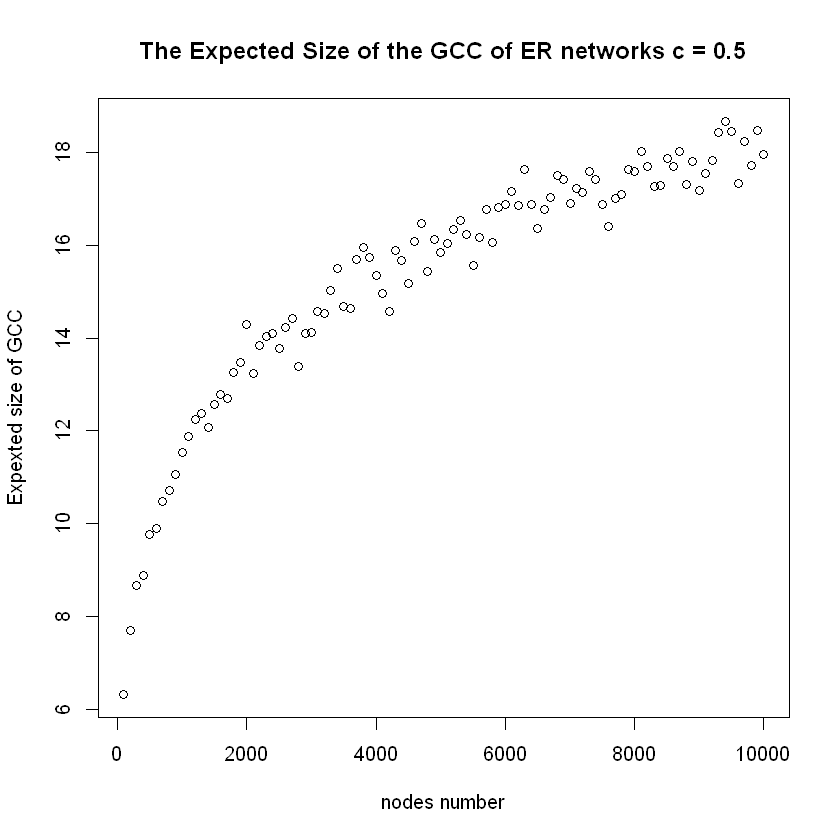

In [7]:
c <- 0.5
n <- seq(100,10000,100)
p <- c/n

ExpectedSize <- function(n,p)
{
  expected_gcc_size = 0
  gcc_size <- 0
  for (i in 1:100)
  {
    g = sample_gnp(n, p, directed = FALSE, loops = FALSE)
    g.components <- clusters(g)
    ix <- which.max(g.components$csize)
    g.giant <- induced.subgraph(g, which(g.components$membership == ix))
    gcc_size <- gcc_size + length(V(g.giant))
  }
  expected_gcc_size<-gcc_size/100
  return(expected_gcc_size) 
}

currSize <- c()
for (i in 1:length(n))
  currSize = c(currSize, ExpectedSize(n[i],p[i]))
plot(n, currSize, main = 'The Expected Size of the GCC of ER networks c = 0.5', xlab = 'nodes number', ylab ='Expexted size of GCC')

# ii.

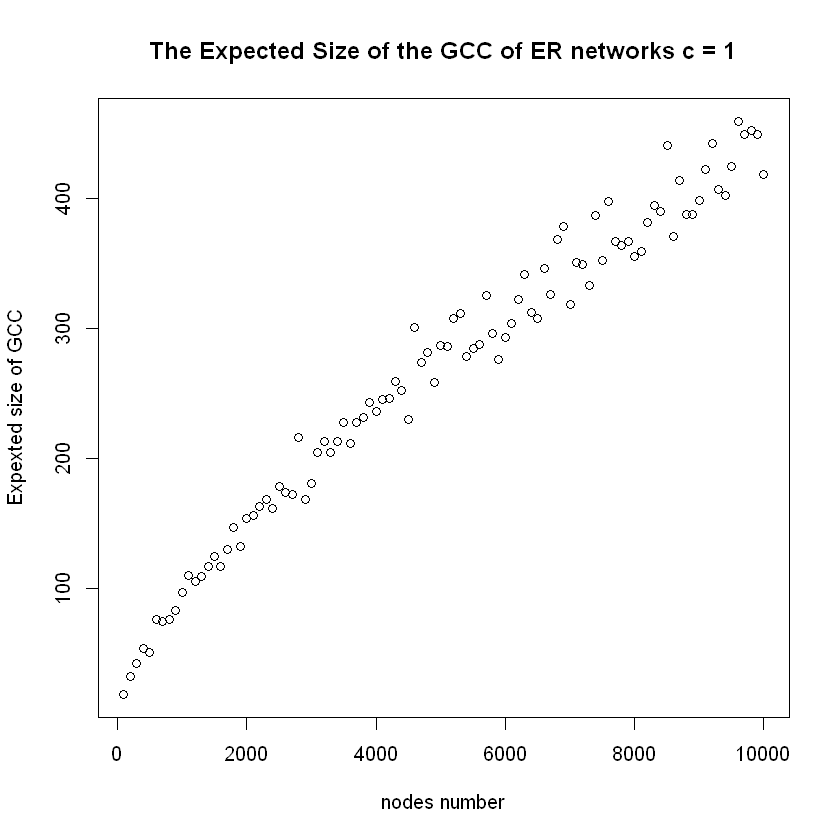

In [8]:
c <- 1
n <- seq(100,10000,100)
p <- c/n

currSize <- c()
for (i in 1:length(n))
  currSize = c(currSize, ExpectedSize(n[i],p[i]))
plot(n, currSize, main = 'The Expected Size of the GCC of ER networks c = 1', xlab = 'nodes number', ylab ='Expexted size of GCC')

# iii.

In [12]:
c <- 1.1
n <- seq(100,10000,100)
p <- c/n
currSize_1.1 <- c()
for (i in 1:length(n))
  currSize_1.1 = c(currSize_1.1, ExpectedSize(n[i],p[i]))

c <- 1.2
n <- seq(100,10000,100)
p <- c/n
currSize_1.2 <- c()
for (i in 1:length(n))
  currSize_1.2 = c(currSize_1.2, ExpectedSize(n[i],p[i]))

c <- 1.3
n <- seq(100,10000,100)
p <- c/n
currSize_1.3 <- c()
for (i in 1:length(n))
  currSize_1.3 = c(currSize_1.3, ExpectedSize(n[i],p[i]))

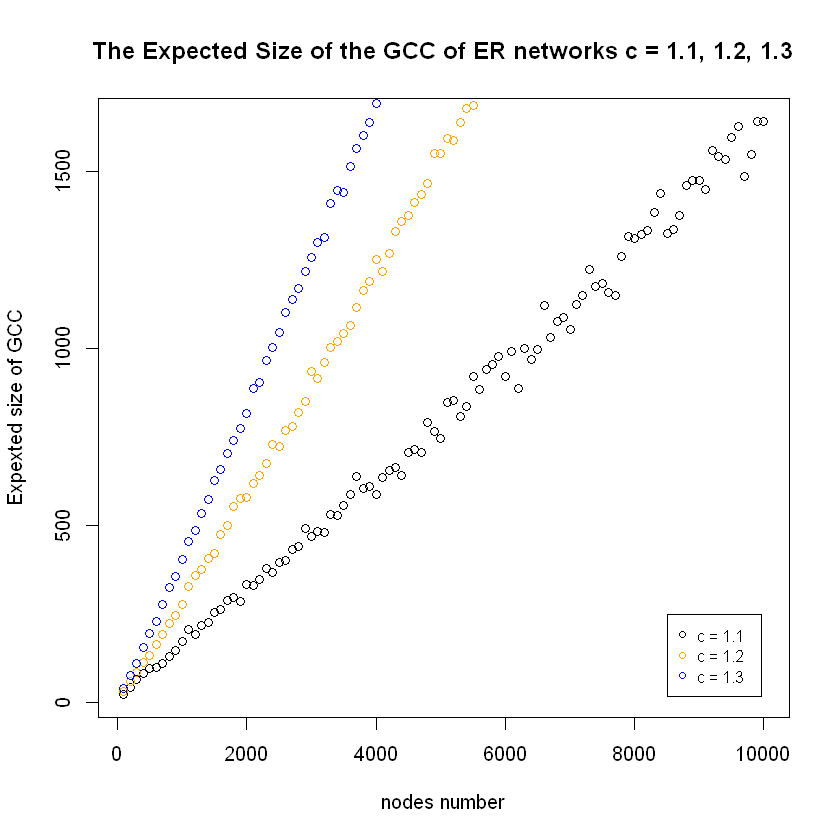

In [14]:
plot(n, currSize_1.1,main = 'The Expected Size of the GCC of ER networks c = 1.1, 1.2, 1.3', xlab = 'nodes number', ylab ='Expexted size of GCC')
points(n,currSize_1.2,col="orange")
points(n,currSize_1.3,col="blue")
legend(8500, 250, legend=c("c = 1.1", "c = 1.2", "c = 1.3"), col=c("black", "orange", "blue"), cex=0.8, pch=c(1,1,1))

# Part 2 Random Walk on Networks 

# 1. Random walk on Erdos-Renyi networks 

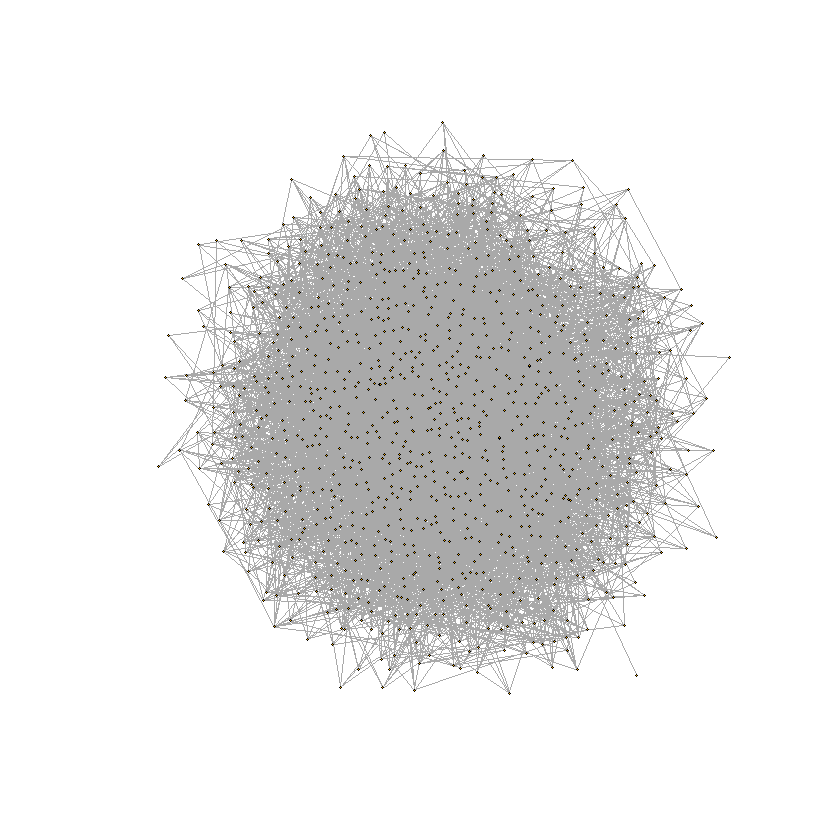

In [15]:
gnp_network = sample_gnp(1000, 0.01, directed = FALSE, loops = FALSE)
plot(gnp_network, vertex.size=1, vertex.label=NA)

# b. plot average and variance of the walk distance.

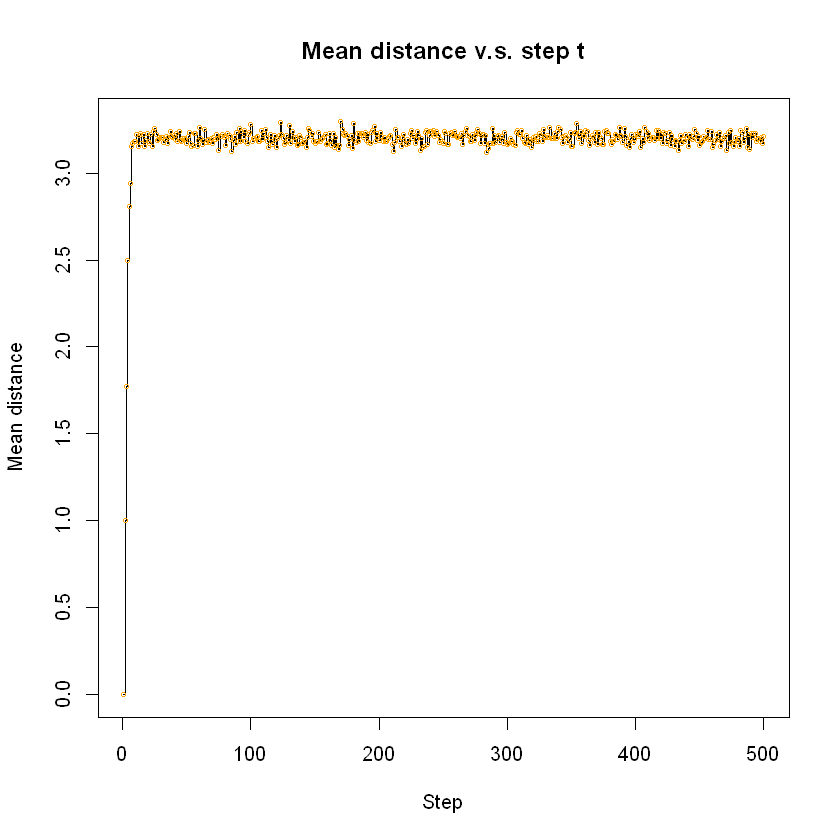

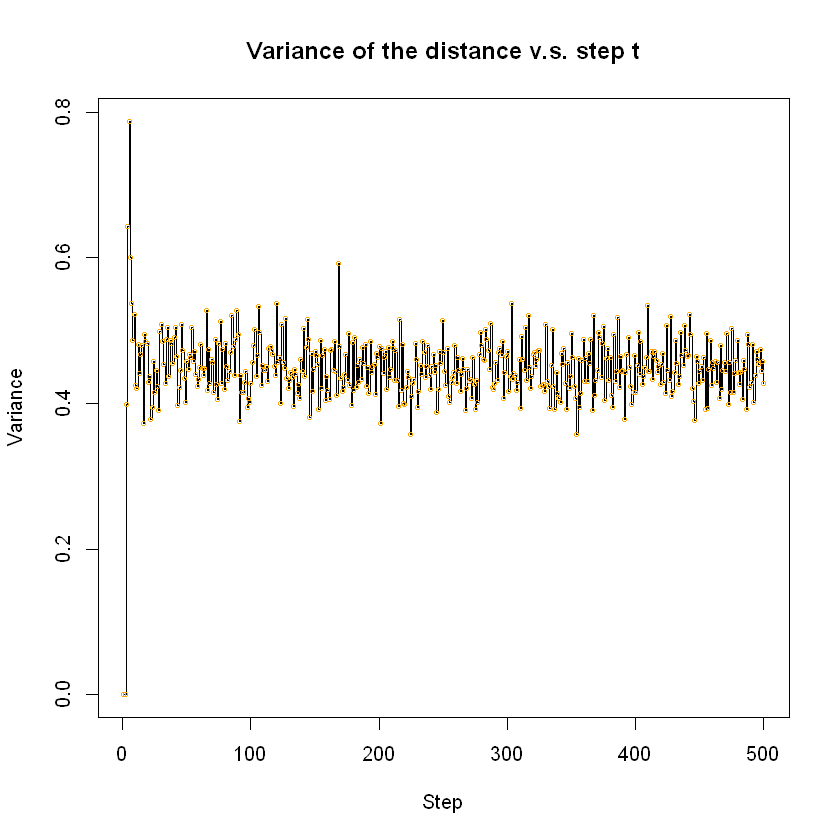

In [25]:
step_num = 500
start_num = 500
start_nodes = sample(1:vcount(gnp_network), 500)
random_walk_stat = function(network,start_nodes,start_num,step_num){
  mean_s = rep(0,step_num)
  var_s = rep(0,step_num)
  st = rep(0,start_num)
  for (steps in 1:step_num) {
    for (starti in 1:start_num) {
      random_trace <- random_walk(network, start = start_nodes[starti], steps = steps)
      st[starti] = distances(network, start_nodes[starti], random_trace[steps])
    }
    mean_s[steps] <- mean(st)    
    var_s[steps] <- var(st)     
  }
  plot(mean_s, type = "s", main="Mean distance v.s. step t",xlab="Step",ylab="Mean distance")
  points(mean_s, cex = .5, col = "orange")
  plot(var_s, type = "s", main="Variance of the distance v.s. step t",xlab="Step",ylab="Variance")
  points(var_s, cex = .5, col = "orange")
}
random_walk_stat(gnp_network,start_nodes,start_num,step_num)

# c. Measure the degree distribution 

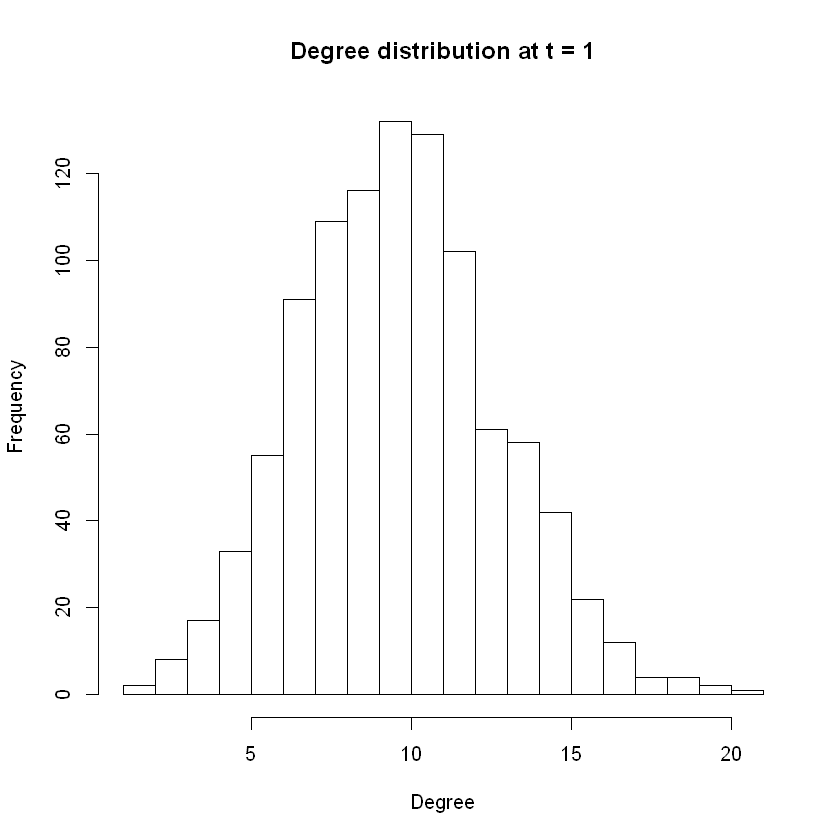

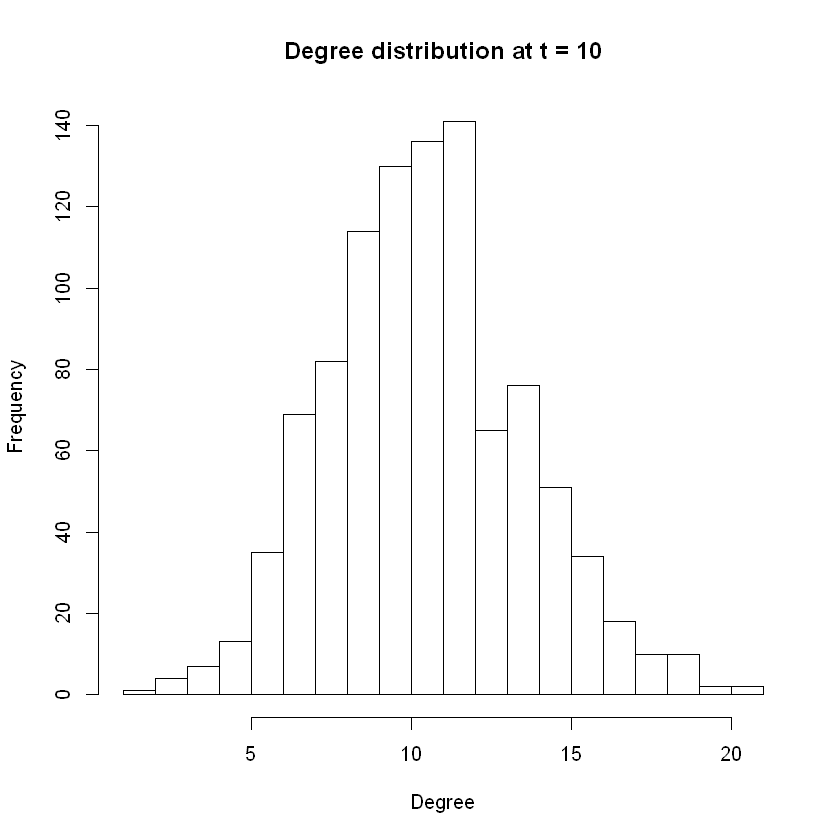

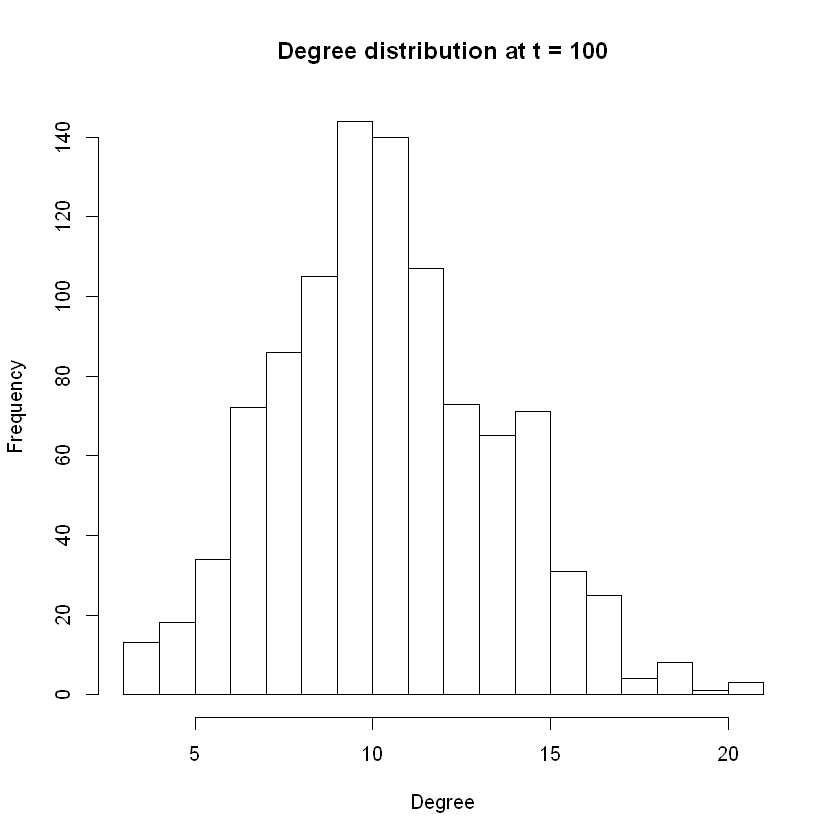

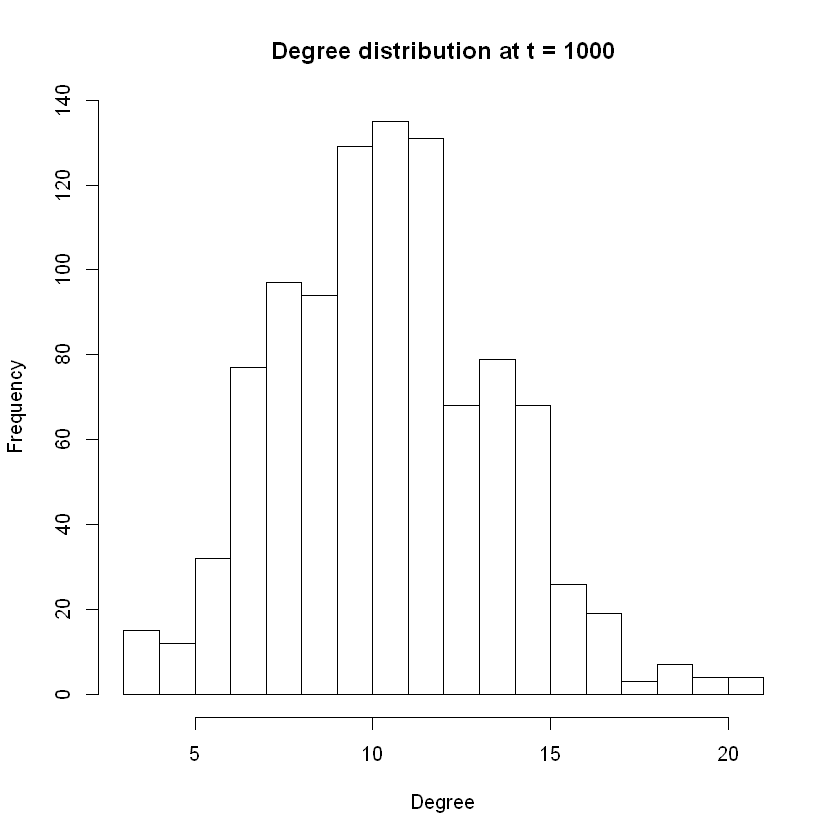

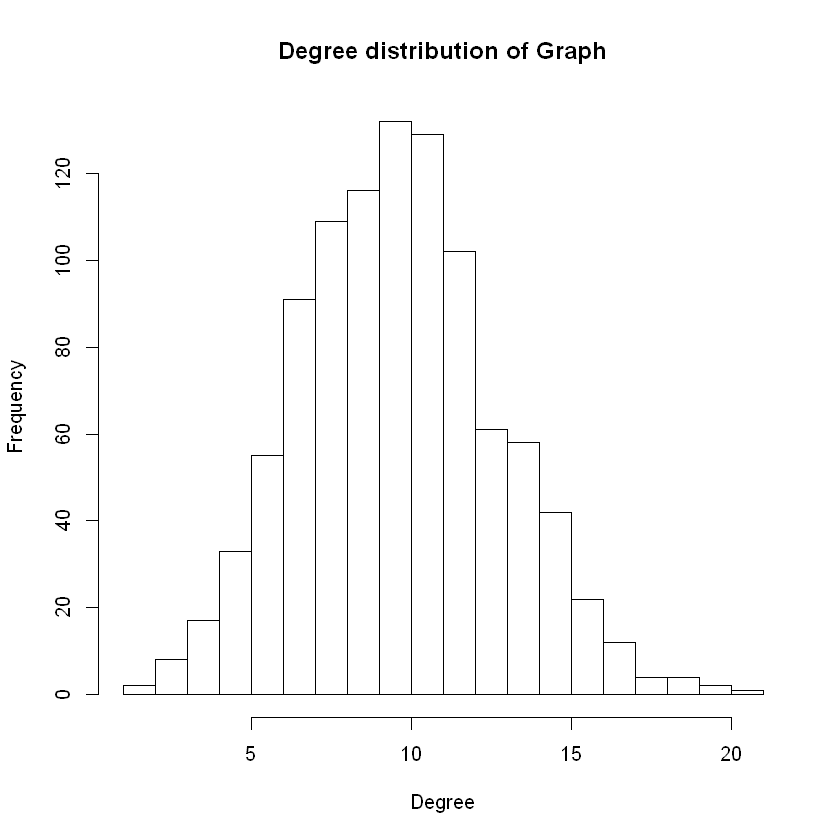

In [27]:
t <- c(1,10,100,1000)
start_nodes = sample(1:vcount(gnp_network), 1000)
start_num = 1000
last_degree_distr = function(network, t, start_num, start_nodes) {
  last_degree = rep(0,start_num)
  for (steps in t) {
    for (starti in 1:start_num) {
      random_trace <- random_walk(network, start = start_nodes[starti], steps = steps)
      last_degree[starti] = degree(network,random_trace[steps])
    }
    hist(last_degree, 
         main = paste("Degree distribution at t =",steps),
         xlab = "Degree", ylab = "Frequency",
         breaks = 20)
  }

  hist(degree(network), 
       main = "Degree distribution of Graph",
       xlab = "Degree", ylab = "Frequency",
       breaks = 20)
}
last_degree_distr(gnp_network, t, start_num, start_nodes)

# d. Change the node number.

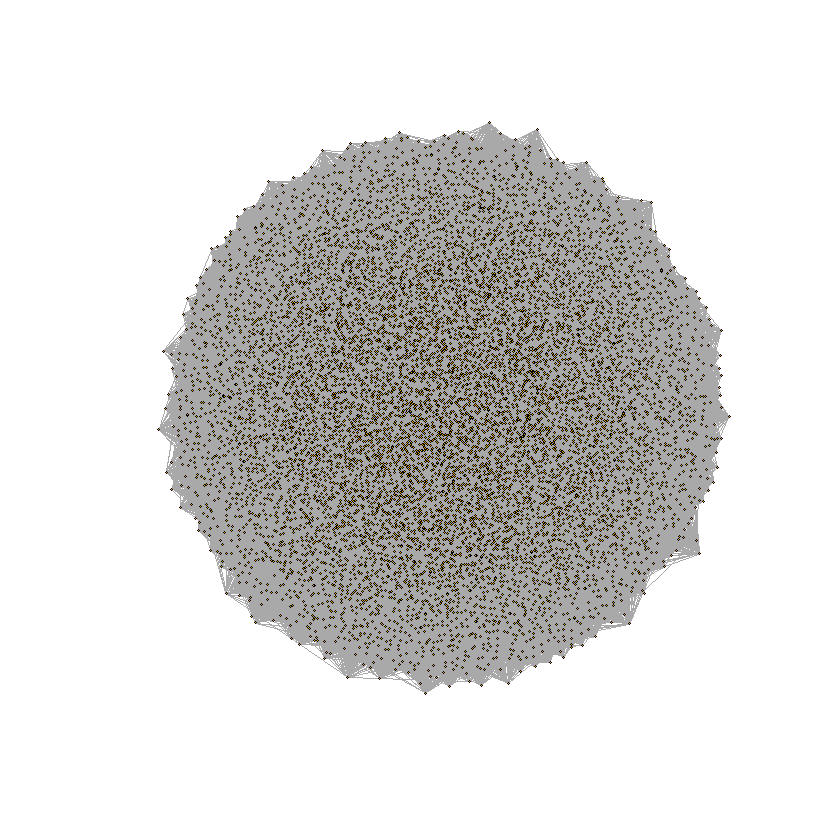

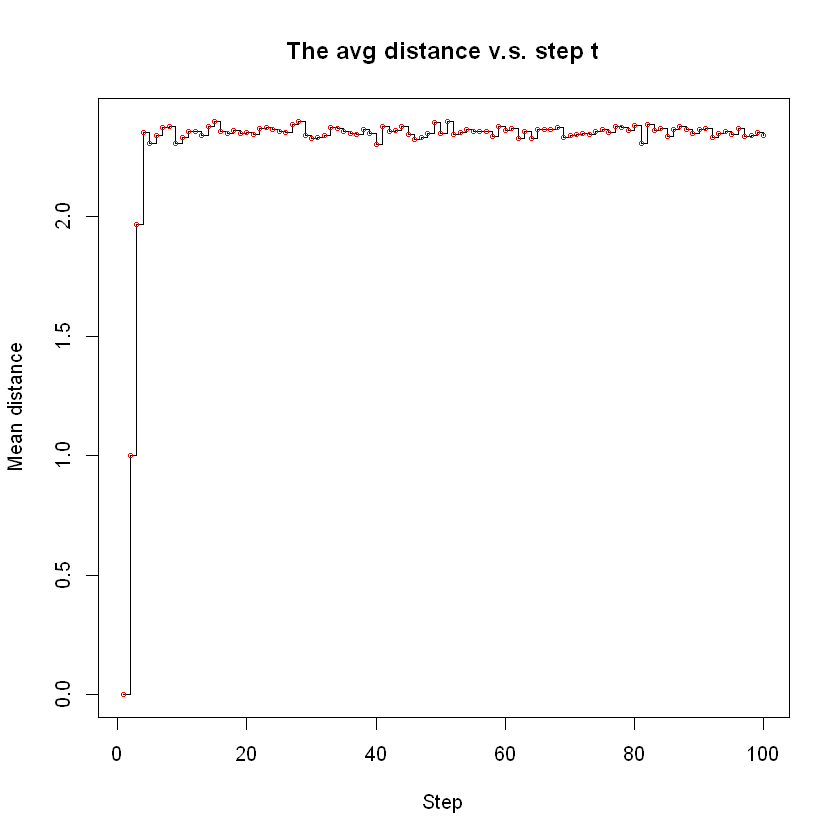

[1] "The diameter of the 1000-node network is 6"
[1] "The diameter of the 10000-node network is 3"


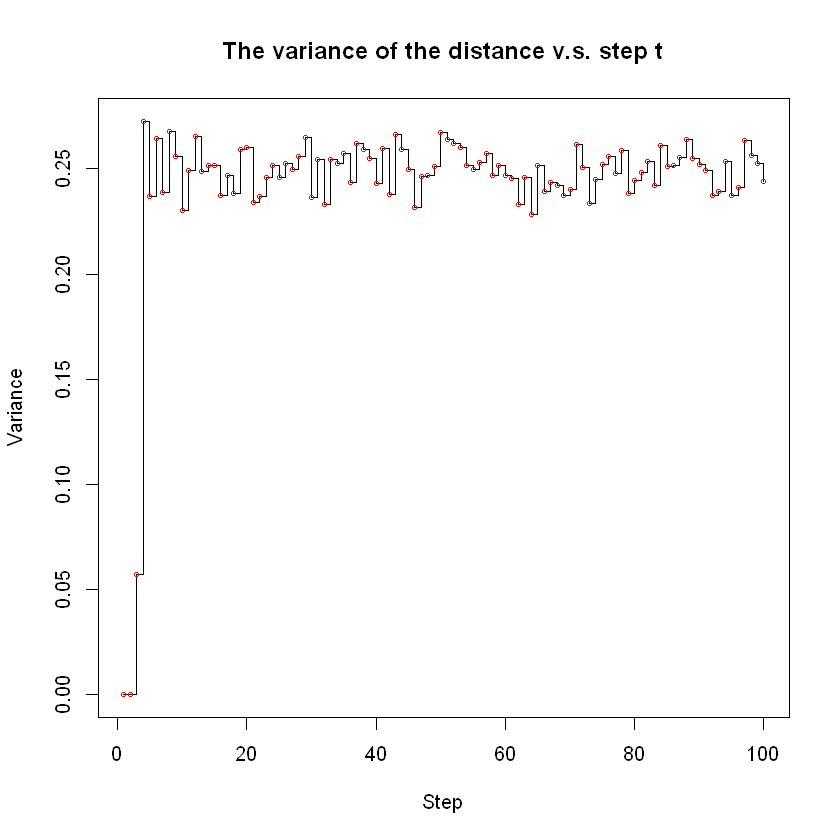

In [19]:
gnp_network2 = sample_gnp(10000, 0.01, directed = FALSE, loops = FALSE)
plot(gnp_network2, vertex.size=1, vertex.label=NA)
step_num = 100
start_num = 500
start_nodes = sample(1:vcount(gnp_network2), 500)
random_walk_stat(gnp_network2,start_nodes,start_num,step_num)
# diameters of two graphs
print(paste("The diameter of the 1000-node network is",diameter(gnp_network, directed = FALSE, unconnected = TRUE, weights = NULL)))    
print(paste("The diameter of the 10000-node network is",diameter(gnp_network2, directed = FALSE, unconnected = TRUE, weights = NULL)))  

# 2 Random walk on networks with fat-tailed degree distribution

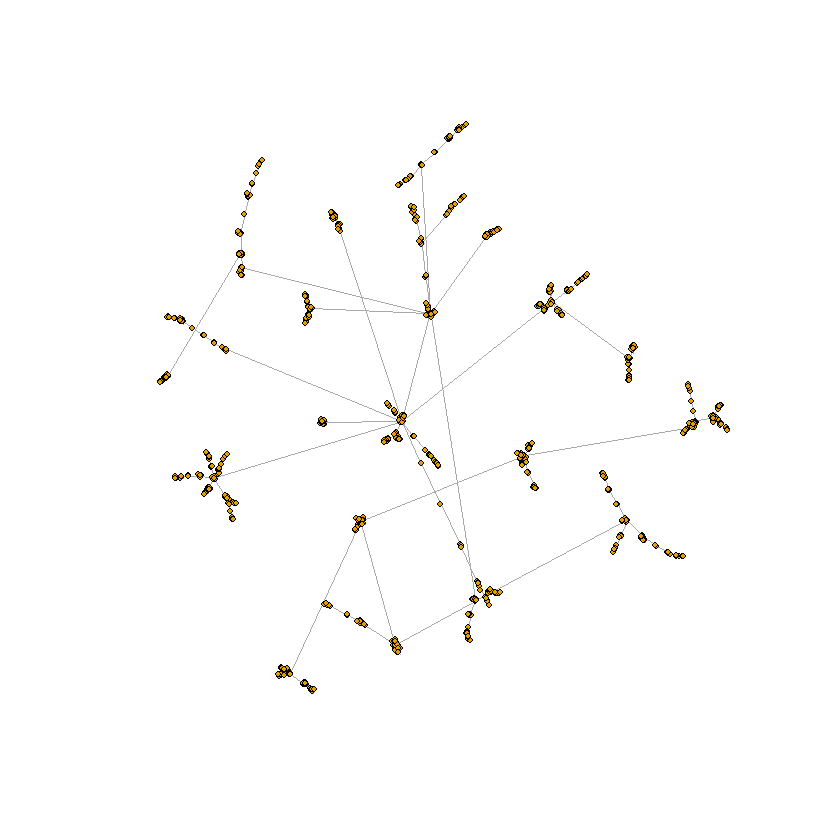

In [28]:
pa_network = sample_pa(1000, power = 1, m = 1, directed = FALSE)
plot(pa_network, vertex.label="", vertex.size=2)


# b. Apply random walk, and plot the mean distance and variance.

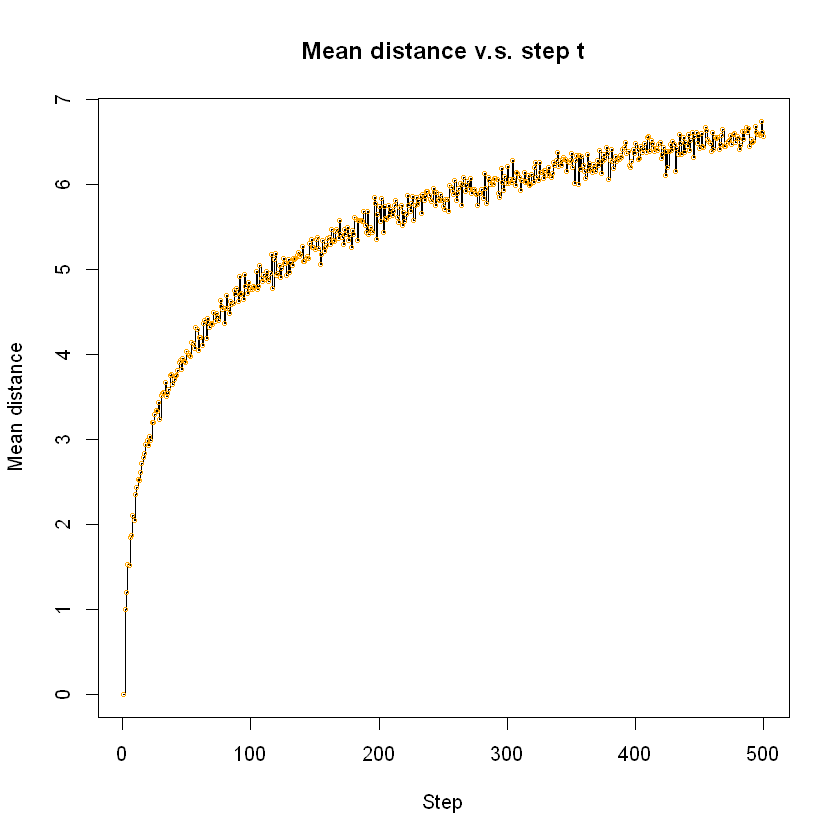

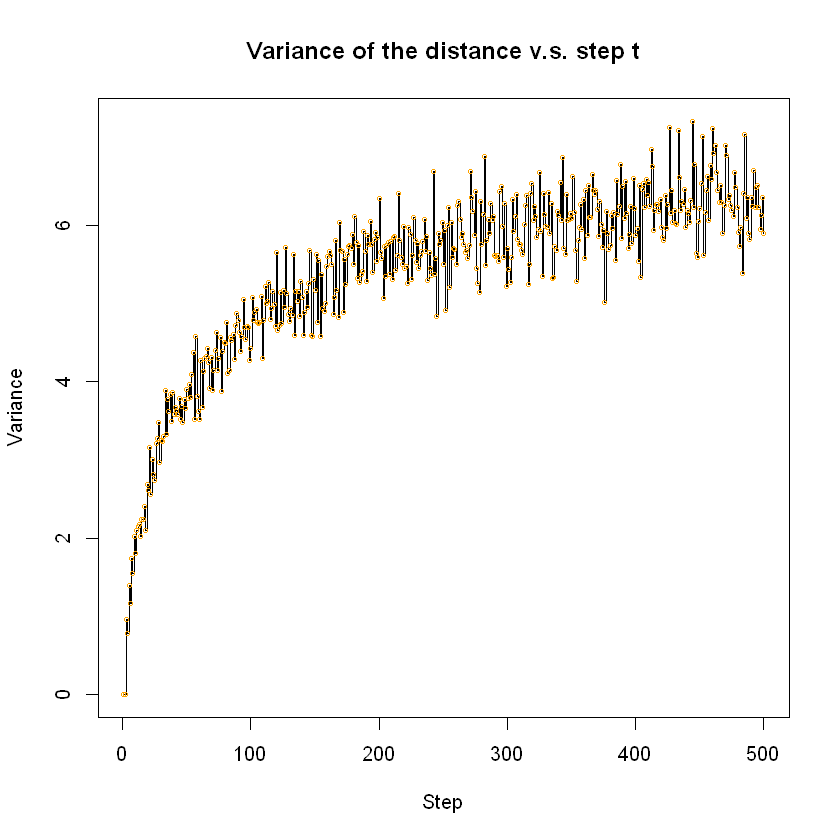

In [30]:
step_num = 500
start_num = 500
start_nodes = sample(1:vcount(pa_network), 500)
random_walk_stat(pa_network,start_nodes,start_num,step_num) 


# c. Measure the degree distribution of the nodes reached at the end of the random walk. 

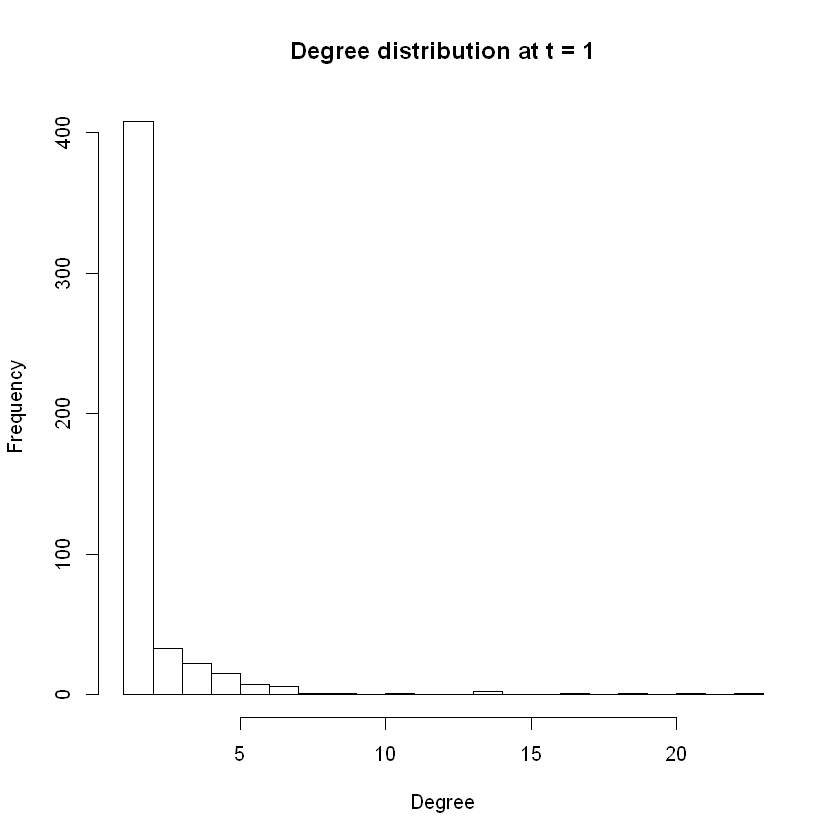

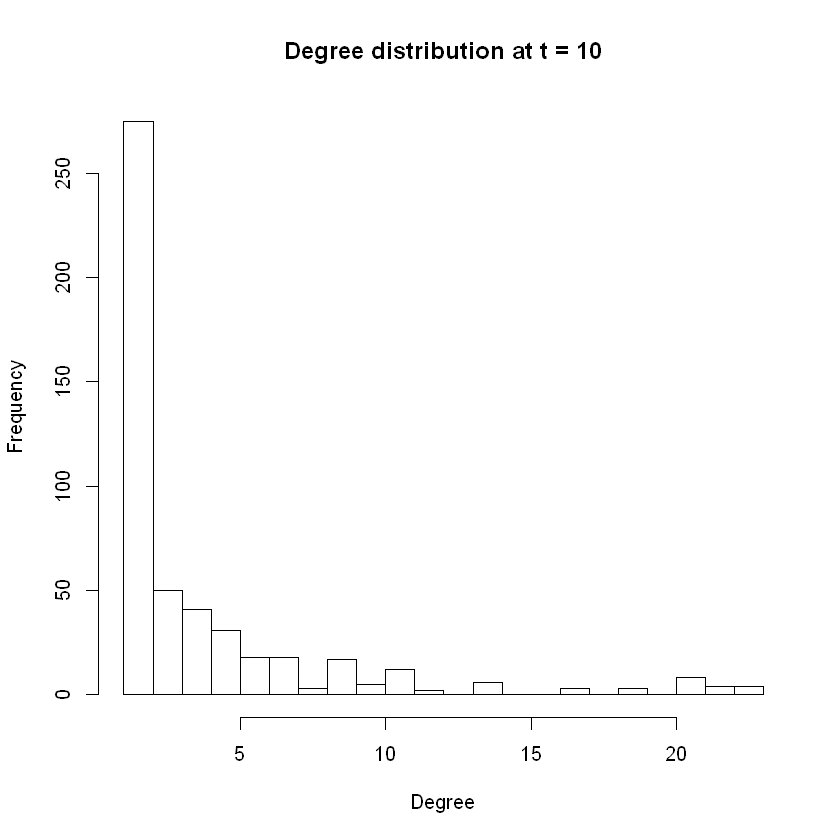

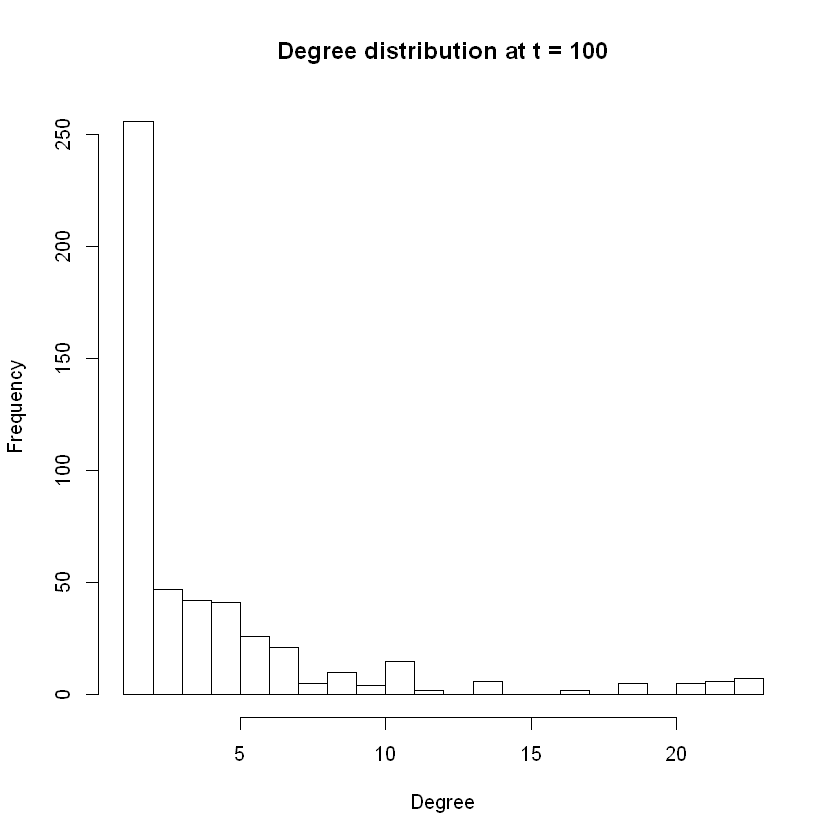

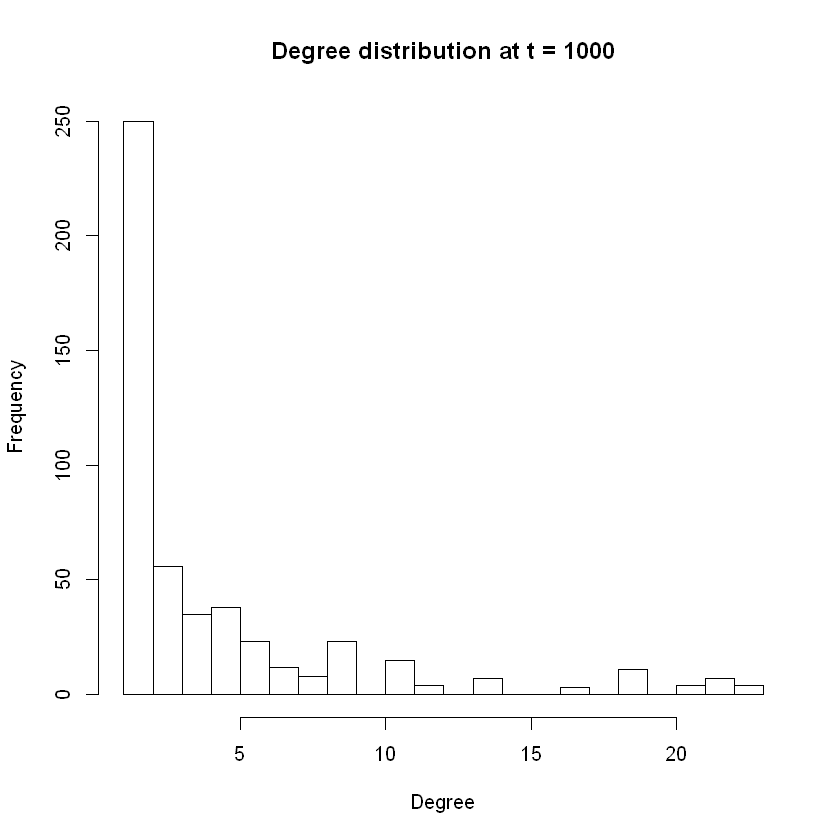

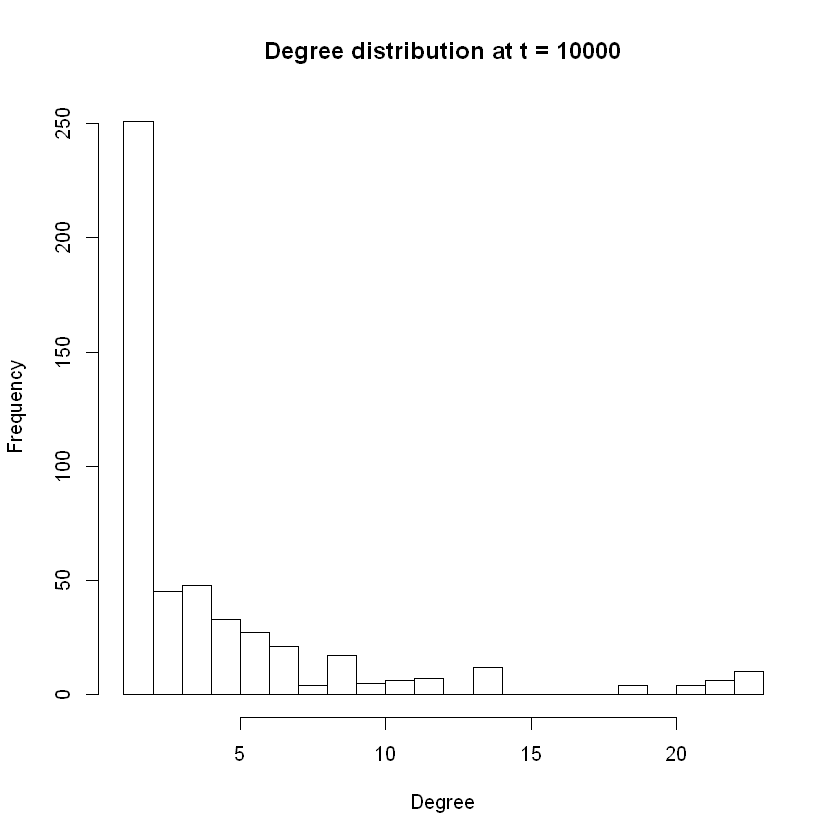

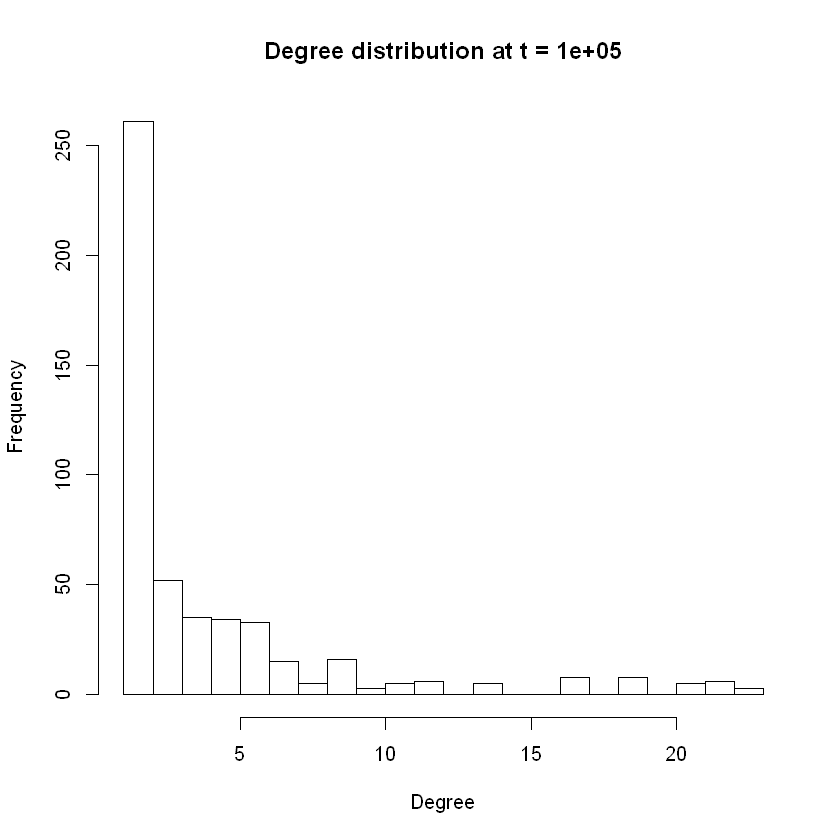

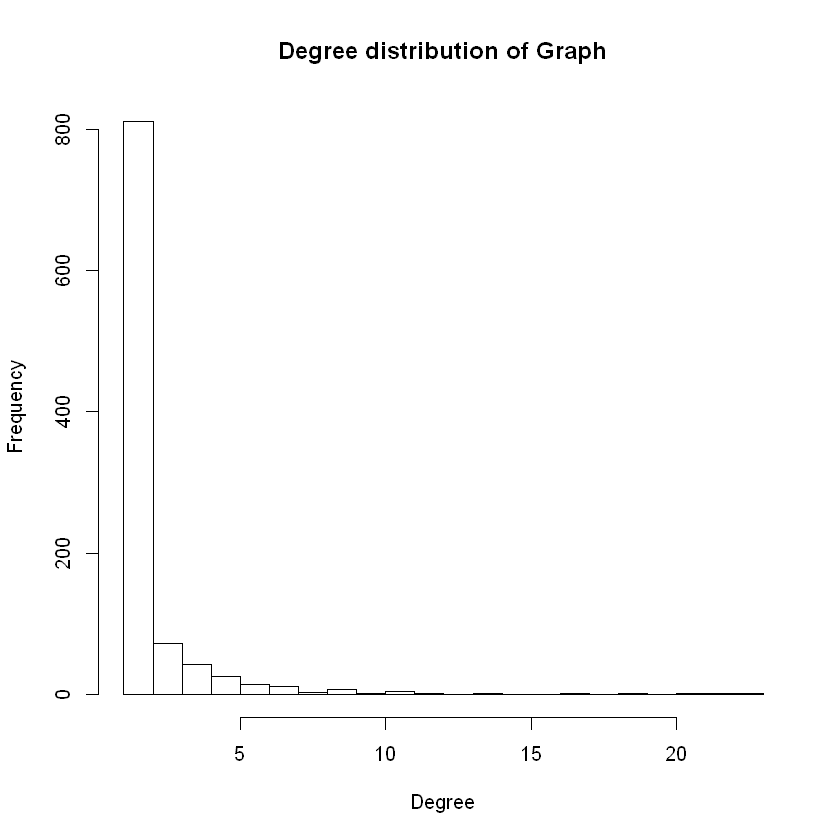

In [32]:
t <- c(1,10,100,1000,10000,100000)
last_degree_distr(pa_network, t, start_num, start_nodes)


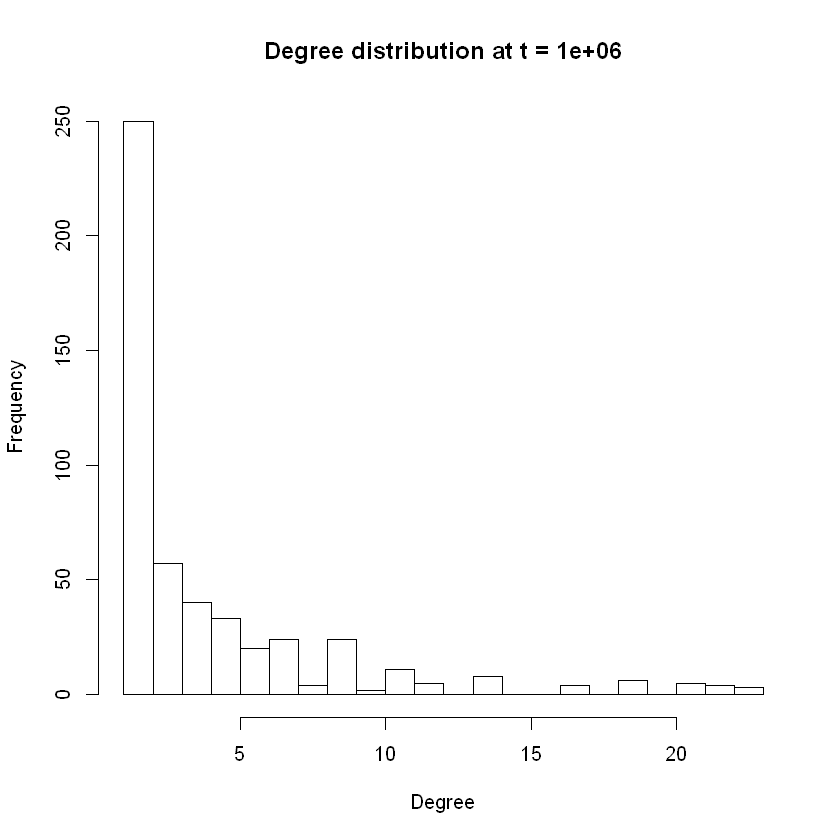

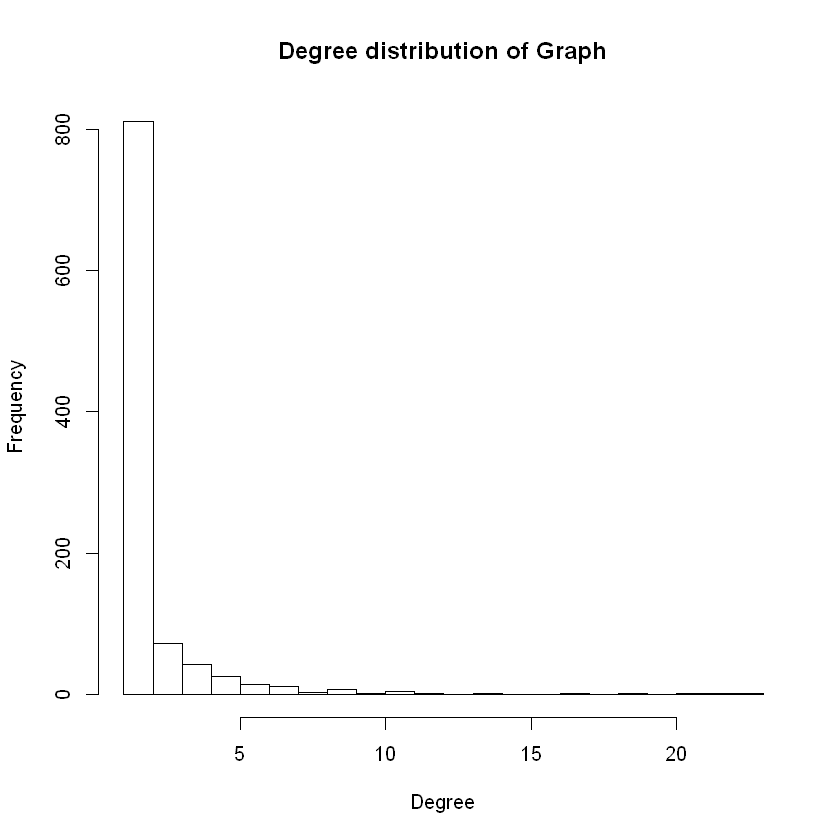

In [33]:
t=1000000
last_degree_distr(pa_network, t, start_num, start_nodes)

# d. Change the node number.

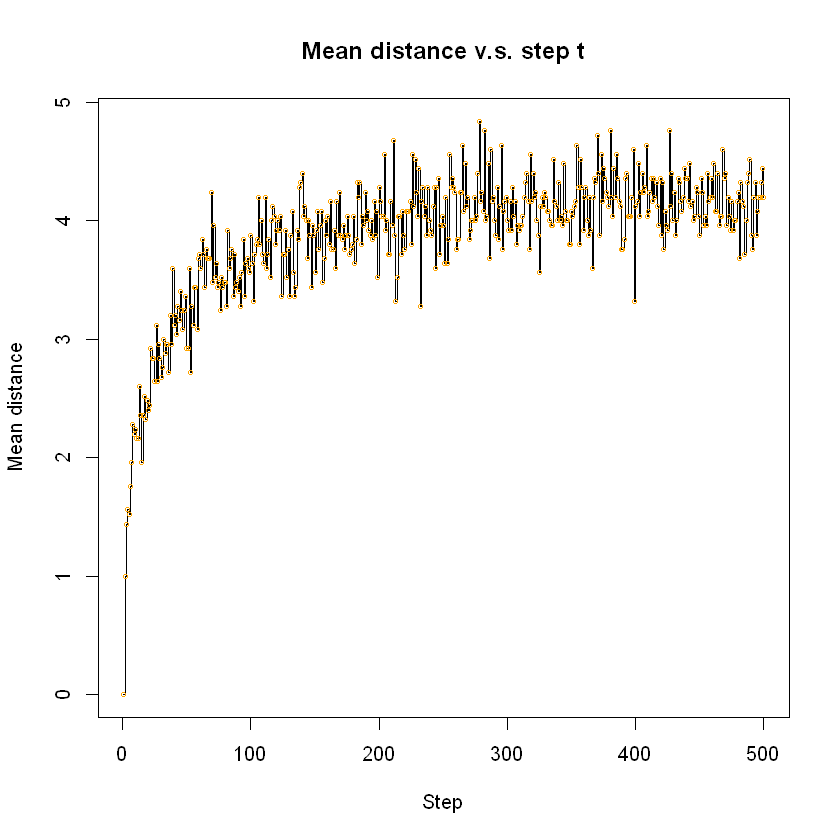

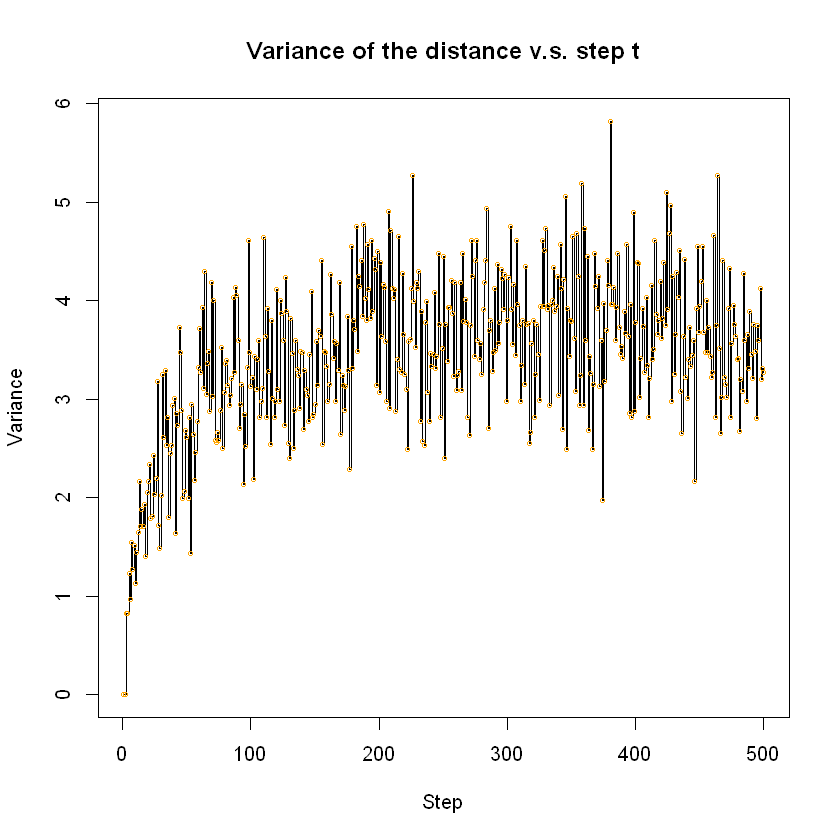

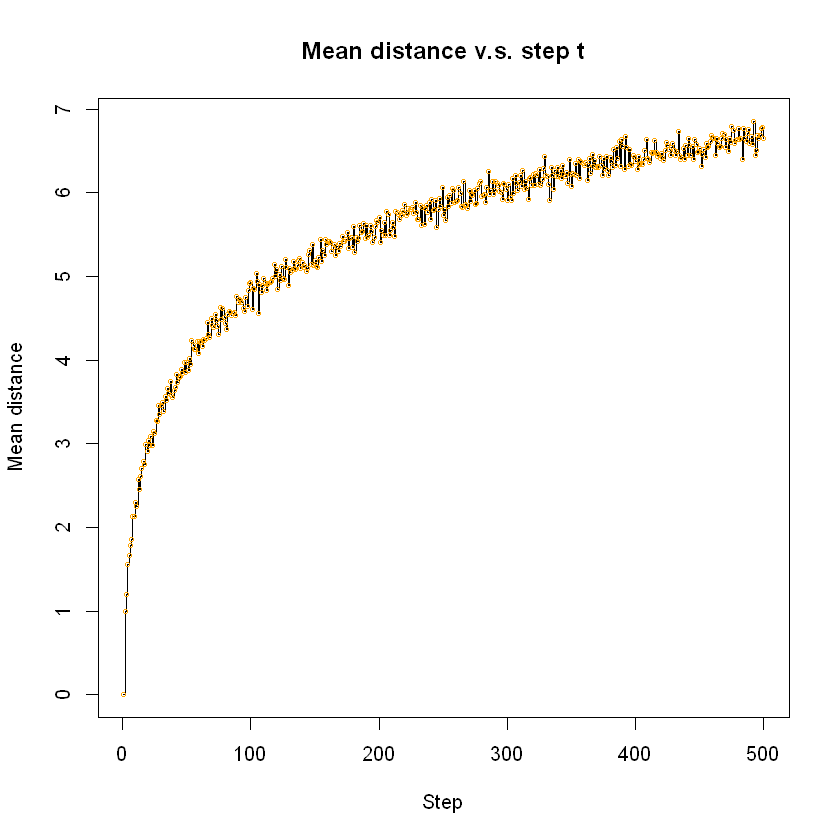

[1] "The diameter of the 100-node network is 11"
[1] "The diameter of the 10000-node network is 27"


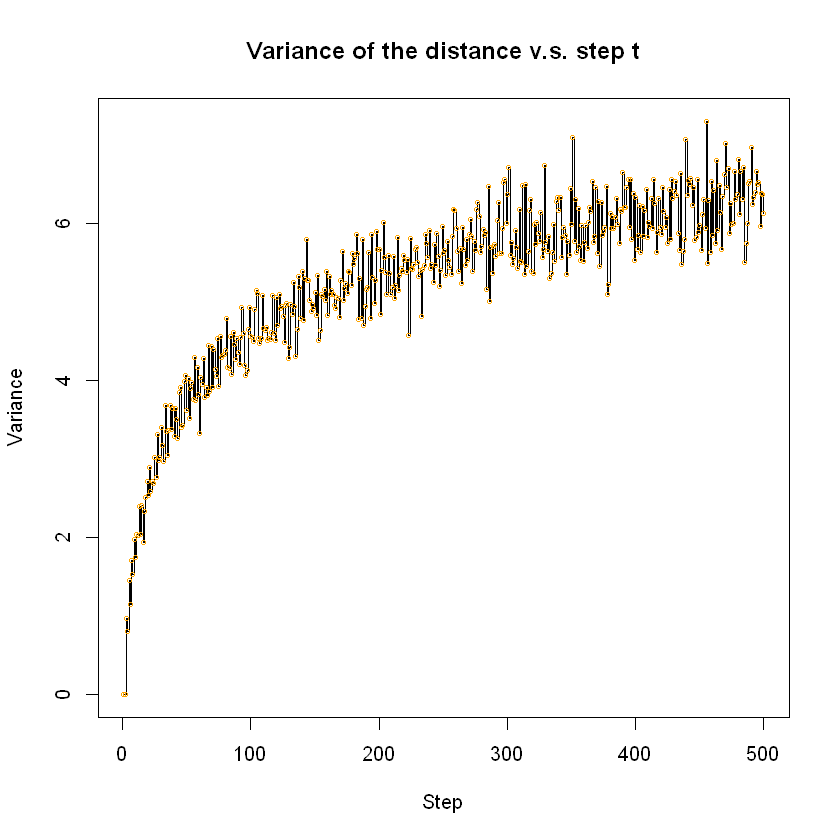

In [37]:
library(igraph)
pa_network100 = sample_pa(100, power = 1, m = 1, directed = FALSE)
pa_network = sample_pa(1000, power = 1, m = 1, directed = FALSE)
pa_network10000 = sample_pa(10000, power = 1, m = 1, directed = FALSE)
step_num = 500
start_num = 50
start_nodes = sample(1:vcount(pa_network100), 50)
random_walk_stat(pa_network100,start_nodes,start_num,step_num)
start_num = 500
start_nodes = sample(1:vcount(pa_network10000), 500)
random_walk_stat(pa_network10000,start_nodes,start_num,step_num)
# diameters of two graphs
print(paste("The diameter of the 100-node network is",diameter(pa_network100, directed = FALSE, unconnected = TRUE, weights = NULL)))  

print(paste("The diameter of the 10000-node network is",diameter(pa_network10000, directed = FALSE, unconnected = TRUE, weights = NULL)))